Dataset: **Normal weight, overweight, and obesity among adults aged 20 and over, by selected characteristics: United States**

Origin: Center for Disease Control and Prevention (CDC)

Link: [https://catalog.data.gov/dataset/normal-weight-overweight-and-obesity-among-adults-aged-20-and-over-by-selected-characteris-8e2b1](https://catalog.data.gov/dataset/normal-weight-overweight-and-obesity-among-adults-aged-20-and-over-by-selected-characteris-8e2b1)

## 1. Project Introduction

This project will investigates the correlection between the obesity and the social factor such as sex, race, and age in the US between 2015-2018. 

## 2. Importing modules and read csv file

In [139]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [55]:
df = pd.read_csv("Normal_weight__overweight__and_obesity_among_adults_aged_20_and_over__by_selected_characteristics__United_States.csv")
df.head()

,INDICATOR,PANEL,PANEL_NUM,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE,SE,FLAG
0,"Normal weight, overweight, and obesity among a...",Normal weight (BMI from 18.5 to 24.9),1,"Percent of population, age-adjusted",1,Total,1,20 years and over,1.1,1988-1994,1,20 years and over,1.0,41.6,0.8,NaN
1,"Normal weight, overweight, and obesity among a...",Normal weight (BMI from 18.5 to 24.9),1,"Percent of population, age-adjusted",1,Total,1,20 years and over,1.1,1999-2002,2,20 years and over,1.0,33.0,0.8,NaN
2,"Normal weight, overweight, and obesity among a...",Normal weight (BMI from 18.5 to 24.9),1,"Percent of population, age-adjusted",1,Total,1,20 years and over,1.1,2001-2004,3,20 years and over,1.0,32.3,0.7,NaN
3,"Normal weight, overweight, and obesity among a...",Normal weight (BMI from 18.5 to 24.9),1,"Percent of population, age-adjusted",1,Total,1,20 years and over,1.1,2003-2006,4,20 years and over,1.0,31.6,0.8,NaN
4,"Normal weight, overweight, and obesity among a...",Normal weight (BMI from 18.5 to 24.9),1,"Percent of population, age-adjusted",1,Total,1,20 years and over,1.1,2005-2008,5,20 years and over,1.0,30.8,0.7,NaN


## 3. Data cleaning


In [56]:
def getInfo(df):
    print("Info about the data:")
    df.info()
    print("\nNum Unique values per column:")
    print(df.nunique())

In [57]:
getInfo(df)

Info about the data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3360 entries, 0 to 3359
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   INDICATOR       3360 non-null   object 
 1   PANEL           3360 non-null   object 
 2   PANEL_NUM       3360 non-null   int64  
 3   UNIT            3360 non-null   object 
 4   UNIT_NUM        3360 non-null   int64  
 5   STUB_NAME       3360 non-null   object 
 6   STUB_NAME_NUM   3360 non-null   int64  
 7   STUB_LABEL      3360 non-null   object 
 8   STUB_LABEL_NUM  3360 non-null   float64
 9   YEAR            3360 non-null   object 
 10  YEAR_NUM        3360 non-null   int64  
 11  AGE             3360 non-null   object 
 12  AGE_NUM         3360 non-null   float64
 13  ESTIMATE        2899 non-null   float64
 14  SE              2899 non-null   float64
 15  FLAG            844 non-null    object 
dtypes: float64(4), int64(4), object(8)
memory usage: 420.1+ K

In [31]:
print("Panels:", df["PANEL"].unique(), end="\n\n")
print("Unit:", df["UNIT"].unique(), end="\n\n")
print("Stub_name:", df["STUB_NAME"].unique(), end="\n\n")
print("Stub_label:", df["STUB_LABEL"].unique(), end="\n\n")
print("Year:", df["YEAR"].unique(), end="\n\n")
print("Age:", df["AGE"].unique(), end="\n\n")
print("Flag:", df["FLAG"].unique(), end="\n\n")

Panels: ['Normal weight (BMI from 18.5 to 24.9)'
 'Obesity (BMI greater than or equal to 30.0)'
 'Overweight or obese (BMI greater than or equal to 25.0)'
 'Grade 1 obesity (BMI from 30.0 to 34.9)'
 'Grade 2 obesity (BMI from 35.0 to 39.9)'
 'Grade 3 obesity (BMI greater than or equal to 40.0)']

Unit: ['Percent of population, age-adjusted' 'Percent of population, crude']

Stub_name: ['Total' 'Sex' 'Race and Hispanic origin'
 'Sex and race and Hispanic origin' 'Percent of poverty level'
 'Sex and age']

Stub_label: ['20 years and over' 'Male' 'Female' 'Not Hispanic or Latino: White only'
 'Male: Not Hispanic or Latino: White only'
 'Female: Not Hispanic or Latino: White only'
 'Not Hispanic or Latino: Black or African American only'
 'Male: Not Hispanic or Latino: Black or African American only'
 'Female: Not Hispanic or Latino: Black or African American only'
 'Not Hispanic or Latino: Asian only'
 'Male: Not Hispanic or Latino: Asian only'
 'Female: Not Hispanic or Latino: Asian only'

**Flag meaning**

'*' : unreliable data, Standard error will be greater than 20%

'---' : no data

nan : normal

'.' : normal, signify data from year 2015-2018

In [82]:
def convertPairsListToDict(pairsList):
    returnDict = {}
    for item in pairsList:
        returnDict[item[0]] = item[1]
    return returnDict

def getMapping(df):
    """
       get encoding lists from the data file 
    """
    panelList = df[["PANEL_NUM", "PANEL"]].drop_duplicates().values
    unitList = df[["UNIT_NUM", "UNIT"]].drop_duplicates().values
    stubNameList = df[["STUB_NAME_NUM", "STUB_NAME"]].drop_duplicates().values
    stubLabelList = df[["STUB_LABEL_NUM", "STUB_LABEL"]].drop_duplicates().values
    yearList = df[["YEAR_NUM", "YEAR"]].drop_duplicates().values
    ageList = df[["AGE_NUM", "AGE"]].drop_duplicates().values
    
    panelDict = convertPairsListToDict(panelList)
    unitDict = convertPairsListToDict(unitList)
    stubNameDict = convertPairsListToDict(stubNameList)
    stubLabelDict = convertPairsListToDict(stubLabelList)
    yearDict = convertPairsListToDict(yearList)
    ageDict = convertPairsListToDict(ageList)
    return panelDict, unitDict, stubNameDict, stubLabelDict, yearDict, ageDict

In [83]:
panelDict, unitDict, stubNameDict, stubLabelDict, yearDict, ageDict = getMapping(df)
print("Panel:", panelDict, end="\n\n")
print("Unit:", unitDict, end="\n\n")
print("Stub Name:", stubNameDict, end="\n\n")
print("Stub Label:", stubLabelDict, end="\n\n")
print("Year:", yearDict, end="\n\n")
print("Age:", ageDict, end="\n\n")

Panel: {1: 'Normal weight (BMI from 18.5 to 24.9)', 3: 'Obesity (BMI greater than or equal to 30.0)', 2: 'Overweight or obese (BMI greater than or equal to 25.0)', 4: 'Grade 1 obesity (BMI from 30.0 to 34.9)', 5: 'Grade 2 obesity (BMI from 35.0 to 39.9)', 6: 'Grade 3 obesity (BMI greater than or equal to 40.0)'}

Unit: {1: 'Percent of population, age-adjusted', 2: 'Percent of population, crude'}

Stub Name: {1: 'Total', 2: 'Sex', 3: 'Race and Hispanic origin', 4: 'Sex and race and Hispanic origin', 5: 'Percent of poverty level', 6: 'Sex and age'}

Stub Label: {1.1: '20 years and over', 2.1: 'Male', 2.2: 'Female', 3.11: 'Not Hispanic or Latino: White only', 3.111: 'Male: Not Hispanic or Latino: White only', 3.112: 'Female: Not Hispanic or Latino: White only', 3.12: 'Not Hispanic or Latino: Black or African American only', 3.121: 'Male: Not Hispanic or Latino: Black or African American only', 3.122: 'Female: Not Hispanic or Latino: Black or African American only', 3.13: 'Not Hispanic or 

In [127]:
# clean data for gender, race, year = 2015-2018 , unit = age-adjusted
encoded_df = df
filtered_df = encoded_df[(encoded_df["UNIT_NUM"] == 1) & (encoded_df["YEAR_NUM"] == 10)]
raceGender_df = filtered_df[filtered_df["STUB_NAME_NUM"] == 4]
genderDict = {3.111: "Male", 3.112: "Female", 3.121: "Male", 3.122: "Female", 3.131: "Male", 3.132: "Female", 3.241: "Male", 3.242: "Female", 3.251: "Male",
       3.252: "Female"}
raceDict = {3.111: "White", 3.112: "White", 3.121: "Black or African American", 3.122: "Black or African American", 3.131: "Asian", 3.132: "Asian", 
            3.241: "Hispanic or Latino", 3.242: "Hispanic or Latino", 3.251: "Hispanic or Latino: Mexican origin", 3.252: "Hispanic or Latino: Mexican origin"}
raceGender_df["Gender"] = raceGender_df["STUB_LABEL_NUM"].map(genderDict)
raceGender_df["Race"] = raceGender_df["STUB_LABEL_NUM"].map(raceDict)

raceGender_df.head()

/var/folders/65/g6p1248x2k319d57_gp2sls00000gn/T/ipykernel_1587/3321275632.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raceGender_df["Gender"] = raceGender_df["STUB_LABEL_NUM"].map(genderDict)
/var/folders/65/g6p1248x2k319d57_gp2sls00000gn/T/ipykernel_1587/3321275632.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raceGender_df["Race"] = raceGender_df["STUB_LABEL_NUM"].map(raceDict)


,INDICATOR,PANEL,PANEL_NUM,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE,SE,FLAG,Gender,Race
49,"Normal weight, overweight, and obesity among a...",Normal weight (BMI from 18.5 to 24.9),1,"Percent of population, age-adjusted",1,Sex and race and Hispanic origin,4,Male: Not Hispanic or Latino: White only,3.111,2015-2018,10,20 years and over,1.0,23.4,1.4,.,Male,White
59,"Normal weight, overweight, and obesity among a...",Normal weight (BMI from 18.5 to 24.9),1,"Percent of population, age-adjusted",1,Sex and race and Hispanic origin,4,Female: Not Hispanic or Latino: White only,3.112,2015-2018,10,20 years and over,1.0,31.9,1.7,.,Female,White
79,"Normal weight, overweight, and obesity among a...",Normal weight (BMI from 18.5 to 24.9),1,"Percent of population, age-adjusted",1,Sex and race and Hispanic origin,4,Male: Not Hispanic or Latino: Black or African...,3.121,2015-2018,10,20 years and over,1.0,26.4,1.7,.,Male,Black or African American
89,"Normal weight, overweight, and obesity among a...",Normal weight (BMI from 18.5 to 24.9),1,"Percent of population, age-adjusted",1,Sex and race and Hispanic origin,4,Female: Not Hispanic or Latino: Black or Afric...,3.122,2015-2018,10,20 years and over,1.0,19.2,1.2,.,Female,Black or African American
109,"Normal weight, overweight, and obesity among a...",Normal weight (BMI from 18.5 to 24.9),1,"Percent of population, age-adjusted",1,Sex and race and Hispanic origin,4,Male: Not Hispanic or Latino: Asian only,3.131,2015-2018,10,20 years and over,1.0,41.9,1.7,.,Male,Asian


In [95]:
# clean data for age, unit_num = crude, year = 2015-2018
filtered_df = encoded_df[(cleaned_df["UNIT_NUM"] == 2) & (encoded_df["YEAR_NUM"] == 10)]
age_df = filtered_df[filtered_df["STUB_NAME_NUM"] == 6]
age_df.head()

,INDICATOR,PANEL,PANEL_NUM,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE,SE,FLAG
450,"Normal weight, overweight, and obesity among a...",Normal weight (BMI from 18.5 to 24.9),1,"Percent of population, crude",2,Sex and age,6,Male: 20-34 years,6.11,2015-2018,10,20-34 years,1.1,32.3,2.1,.
460,"Normal weight, overweight, and obesity among a...",Normal weight (BMI from 18.5 to 24.9),1,"Percent of population, crude",2,Sex and age,6,Male: 35-44 years,6.12,2015-2018,10,35-44 years,1.2,18.7,2.0,.
470,"Normal weight, overweight, and obesity among a...",Normal weight (BMI from 18.5 to 24.9),1,"Percent of population, crude",2,Sex and age,6,Male: 45-54 years,6.13,2015-2018,10,45-54 years,1.3,16.2,1.9,.
480,"Normal weight, overweight, and obesity among a...",Normal weight (BMI from 18.5 to 24.9),1,"Percent of population, crude",2,Sex and age,6,Male: 55-64 years,6.14,2015-2018,10,55-64 years,1.4,21.5,2.6,.
490,"Normal weight, overweight, and obesity among a...",Normal weight (BMI from 18.5 to 24.9),1,"Percent of population, crude",2,Sex and age,6,Male: 65-74 years,6.15,2015-2018,10,65-74 years,1.5,15.6,2.4,.


In [96]:
# clean data for poverty, unit = age-adjusted, year = 2015-2018
filtered_df = encoded_df[(encoded_df["UNIT_NUM"] == 1) & (encoded_df["YEAR_NUM"] == 10)]
poverty_df = filtered_df[filtered_df["STUB_NAME_NUM"] == 5]
poverty_df.head()

,INDICATOR,PANEL,PANEL_NUM,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE,SE,FLAG
189,"Normal weight, overweight, and obesity among a...",Normal weight (BMI from 18.5 to 24.9),1,"Percent of population, age-adjusted",1,Percent of poverty level,5,Below 100%,5.1,2015-2018,10,20 years and over,1.0,24.3,1.5,.
199,"Normal weight, overweight, and obesity among a...",Normal weight (BMI from 18.5 to 24.9),1,"Percent of population, age-adjusted",1,Percent of poverty level,5,100%-199%,5.2,2015-2018,10,20 years and over,1.0,25.4,1.5,.
209,"Normal weight, overweight, and obesity among a...",Normal weight (BMI from 18.5 to 24.9),1,"Percent of population, age-adjusted",1,Percent of poverty level,5,200%-399%,5.3,2015-2018,10,20 years and over,1.0,24.6,1.4,.
219,"Normal weight, overweight, and obesity among a...",Normal weight (BMI from 18.5 to 24.9),1,"Percent of population, age-adjusted",1,Percent of poverty level,5,400% or more,5.4,2015-2018,10,20 years and over,1.0,27.6,1.7,.
750,"Normal weight, overweight, and obesity among a...",Overweight or obese (BMI greater than or equal...,2,"Percent of population, age-adjusted",1,Percent of poverty level,5,Below 100%,5.1,2015-2018,10,20 years and over,1.0,73.5,1.5,.


## 4. EDA

Plan: 

- race vs obesity
- age vs obesity
- poverty vs obesity
    

In [122]:
raceGender_df[["STUB_LABEL_NUM", "STUB_LABEL"]].drop_duplicates().values

array([[3.111, 'Male: Not Hispanic or Latino: White only'],
       [3.112, 'Female: Not Hispanic or Latino: White only'],
       [3.121,
        'Male: Not Hispanic or Latino: Black or African American only'],
       [3.122,
        'Female: Not Hispanic or Latino: Black or African American only'],
       [3.131, 'Male: Not Hispanic or Latino: Asian only'],
       [3.132, 'Female: Not Hispanic or Latino: Asian only'],
       [3.241, 'Male: Hispanic or Latino: All races'],
       [3.242, 'Female: Hispanic or Latino: All races'],
       [3.251, 'Male: Hispanic or Latino: Mexican origin: All races'],
       [3.252, 'Female: Hispanic or Latino: Mexican origin: All races']],
      dtype=object)

In [129]:
# race vs obesity
print("General obesity")
generalObesity_df = raceGender_df[raceGender_df["PANEL_NUM"] == 3]
raceGeneralObesity = generalObesity_df[["Gender", "Race", "ESTIMATE", "SE"]]
print(raceGeneralObesity)


# race vs each level of obesity:
# level 1
print("\nObesity grade 1")
obesity1_df = raceGender_df[raceGender_df["PANEL_NUM"] == 4]
raceObesity1 = obesity1_df[["Gender", "Race", "ESTIMATE", "SE"]]
print(raceObesity1)

# level 2
print("\nObesity grade 2")
obesity2_df = raceGender_df[raceGender_df["PANEL_NUM"] == 5]
raceObesity2 = obesity2_df[["Gender", "Race", "ESTIMATE", "SE"]]
print(raceObesity2)

# level 3
print("\nObesity grade 3")
obesity3_df = raceGender_df[raceGender_df["PANEL_NUM"] == 6]
raceObesity3 = obesity3_df[["Gender", "Race", "ESTIMATE", "SE"]]
print(raceObesity3)

General obesity
      Gender                                Race  ESTIMATE   SE
1171    Male                               White      41.3  2.3
1182  Female                               White      39.0  1.7
1203    Male           Black or African American      39.3  1.7
1213  Female           Black or African American      56.2  1.5
1233    Male                               Asian      13.3  1.4
1244  Female                               Asian      16.0  1.0
1264    Male                  Hispanic or Latino      44.3  1.6
1274  Female                  Hispanic or Latino      47.1  1.5
1294    Male  Hispanic or Latino: Mexican origin      48.8  1.7
1304  Female  Hispanic or Latino: Mexican origin      51.4  2.2

Obesity grade 1
      Gender                                Race  ESTIMATE   SE
1733    Male                               White      25.2  2.0
1744  Female                               White      18.4  1.2
1765    Male           Black or African American      21.0  1.1
1775  F

In [ ]:
# age vs obesity

In [ ]:
# poverty vs obesity

## 5. Visualizations


### a. Race vs Obesity

Text(0.5, 1.0, 'Asians tend to be less susceptible to obesity in general')

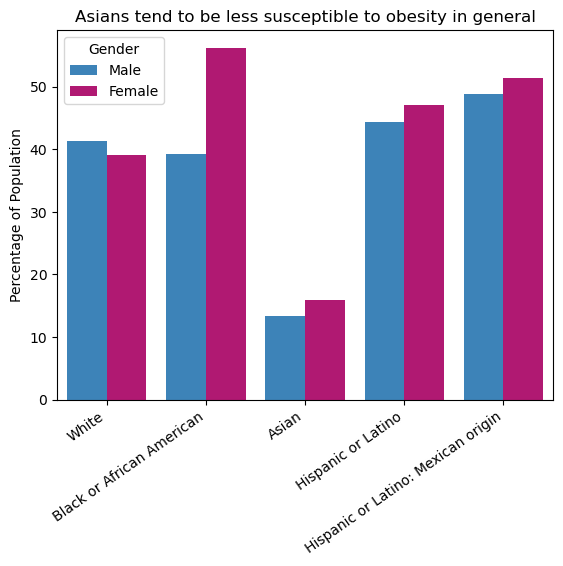

In [172]:
# race vs obesity
ax = sns.barplot(raceGeneralObesity, x="Race", y="ESTIMATE", hue="Gender", palette=["#2986cc", "#c90076"])
ax.set_ylabel("Percentage of Population")
ax.set_xlabel(None)
ax.set_xticklabels(ax.get_xticklabels(), rotation=35, ha="right")
ax.set_title("Asians tend to be less susceptible to obesity in general")

matplotlib.figure.Figure

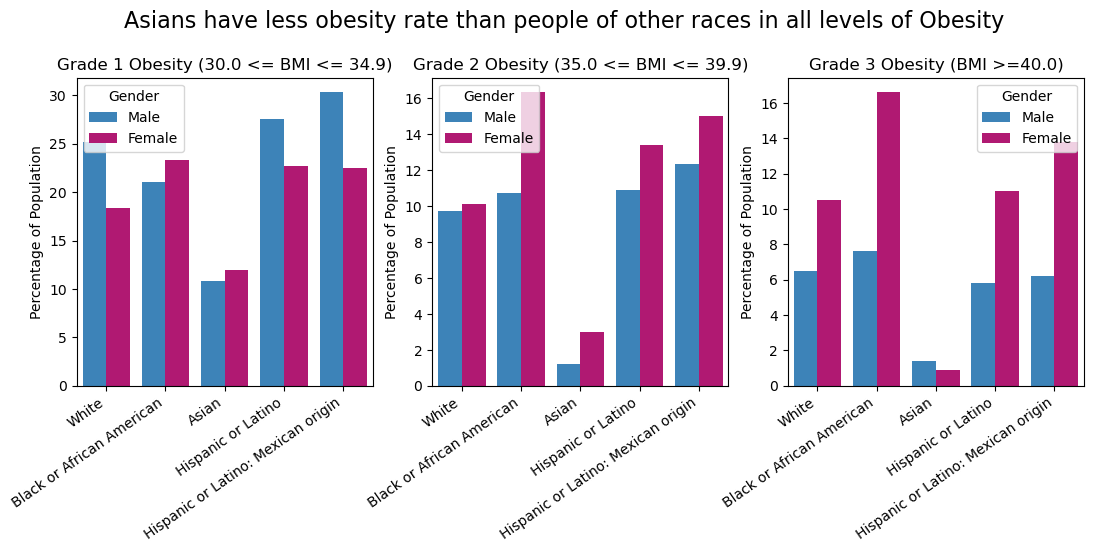

In [176]:
# race vs obesity grade 2
fig, axes = plt.subplots(1, 3, figsize=(13, 4))

ax1 = sns.barplot(ax=axes[0], data=raceObesity1, x="Race", y="ESTIMATE", hue="Gender", palette=["#2986cc", "#c90076"])
ax2 = sns.barplot(ax=axes[1], data=raceObesity2, x="Race", y="ESTIMATE", hue="Gender", palette=["#2986cc", "#c90076"])
ax3 = sns.barplot(ax=axes[2], data=raceObesity3, x="Race", y="ESTIMATE", hue="Gender", palette=["#2986cc", "#c90076"])
ax1.set_title("Grade 1 Obesity (30.0 <= BMI <= 34.9)")
ax1.set_ylabel("Percentage of Population")
ax1.set_xlabel(None)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=35, ha="right")
ax2.set_title("Grade 2 Obesity (35.0 <= BMI <= 39.9)")
ax2.set_ylabel("Percentage of Population")
ax2.set_xlabel(None)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=35, ha="right")
ax3.set_title("Grade 3 Obesity (BMI >=40.0)")
ax3.set_ylabel("Percentage of Population")
ax3.set_xlabel(None)
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=35, ha="right")

fig.suptitle("Asians have less obesity rate than people of other races in all levels of Obesity", fontsize=16, y=1.05)
type(fig)